In [6]:
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib.patches import Circle,Rectangle
import numpy as np
import math
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [7]:
def ss(a,b):
    output=[a[0]]
    for (i,j) in zip(a[1:],b):
        output.extend([j,i])

    return output
def angle(vector):
    r=distance(vector[0],vector[1])
    if vector[1]>0 and r!=0:
        theta=math.acos(vector[0]/r)
    elif r!=0:
        theta=2*math.pi-math.acos(vector[0]/r)
    else:
        return 0
    return theta
distance=lambda x,y:math.sqrt(math.pow(x,2)+math.pow(y,2))
def spring(y0=10,y1=0,samples=10,width=2,x0=0,x1=0):
    
    desired_vector=[x1-x0,y1-y0]
    r=distance(desired_vector[0],desired_vector[1])
    #y 10to0 x 0,0
    y=ss(np.linspace(0,r,samples+1)[::-1],np.linspace(0+((r)/(2*samples)),r-((r)/(2*samples)),samples)[::-1])
    x=[0]
    x.extend([0+width/2,0-width/2]*(samples-1))
    x.extend([0+width/2,0])
    #spring vector heading right meaning its theta is 0
    
   
    spring_theta=3/4*360
    
    
    
    
    if desired_vector[1]>0:
        theta=math.acos(desired_vector[0]/r)
    else:
        theta=2*math.pi-math.acos(desired_vector[0]/r)
    theta=(theta/(math.pi*2))*360
    degree=theta-spring_theta
    x,y=rotate_spring(x,y,degree=degree,x0=0,y0=r)
    x,y=x-0+x0,y-r+y0
    return x,y
        
        



In [8]:
def rotate_vector(vector,degree=20):
    theta=2*math.pi*(degree/360)
    x,y=vector
    x1=x*math.cos(theta)-y*math.sin(theta)
    y1=x*math.sin(theta)+y*math.cos(theta)
    return x1,y1


In [9]:

#x,y=spring(x0=0,y0=10,x1=0,y1=1,samples=spring_edges,width=spring_width)
def rotate_spring(x,y,degree=20,x0=0,y0=10):

    xx=np.array(x)-x0
    yy=np.array(y)-y0
    x_new,y_new=[],[]
    for i,j in zip(xx,yy):
        vector=(i,j)
        x1,y1=rotate_vector(vector,degree)
        x_new.append(x1)
        y_new.append(y1)
    x_new=np.array(x_new)
    y_new=np.array(y_new)
    x_new=x_new+x0
    y_new=y_new+y0
    return x_new,y_new
#x_new,y_new=rotate_spring(x,y)
#plt.plot(x,y)
#plt.plot(xx,yy)
#plt.plot(x_new,y_new)
#plt.xlim([-12,12])
#plt.ylim([-12,12])

In [10]:
added_force

NameError: name 'added_force' is not defined

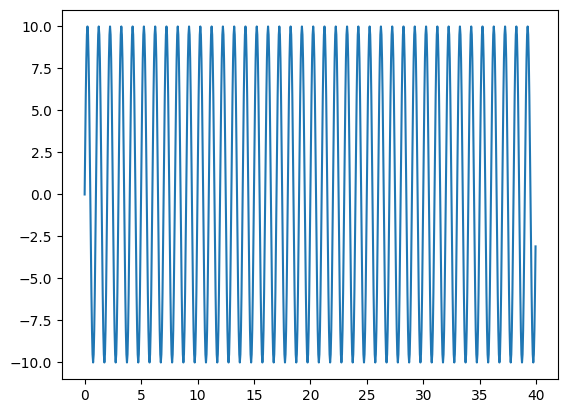

In [16]:
delta=0.05
t=np.arange(0,40,delta)
x_position=10*np.sin(2*np.pi*t)
y_position=10*np.cos(t)
plt.plot(t,x_position)

Circle(xy=(-4.79184, -0.284003), radius=2) selected
[-4.63709677 -0.7034632 ]
[-7.05645161 -0.7034632 ]
[-7.66129032 -0.7034632 ]
[-8.87096774 -0.7034632 ]
[-9.07258065 -0.7034632 ]
[-9.47580645 -0.7034632 ]
[-12.09677419  -1.78571429]
[-12.7016129   -2.32683983]
[-14.71774194  -4.22077922]
[-16.73387097  -5.57359307]
[-16.93548387  -5.84415584]
[-16.73387097  -5.84415584]
[-16.33064516  -5.57359307]
[-15.92741935  -5.57359307]
[-15.12096774  -5.57359307]
[-14.71774194  -5.57359307]
[-14.51612903  -5.57359307]
[-14.11290323  -5.57359307]
[-14.11290323  -5.3030303 ]
[-13.91129032  -5.3030303 ]
friction
accelerate
Circle(xy=(-1.92785, 0.642386), radius=2) selected
[-2.01612903 -0.16233766]
[-2.01612903 -0.97402597]
[-1.81451613 -4.22077922]
[-1.41129032 -5.84415584]
[-1.41129032 -6.65584416]
[-1.41129032 -7.73809524]
[-1.41129032 -8.00865801]
[-1.20967742 -8.27922078]
[-1.20967742 -8.82034632]
[-1.20967742 -9.63203463]
Circle(xy=(-1.44244, -0.69543), radius=2) selected
[-1.20967742 -0.43

<__main__.electron object .>

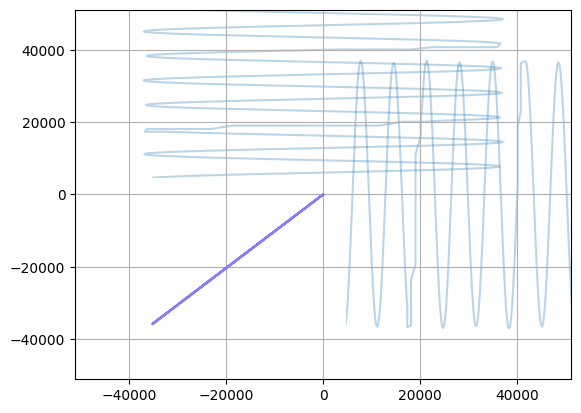

In [15]:
class electron(tk.Tk):
    def __init__(self):
        super().__init__()
        self.fig=plt.figure()
        #self.ax=plt.gca()
        self.ax1=self.fig.add_subplot(122)
        self.ax1.set_axis_off()
        self.ax2=self.fig.add_subplot(211)
        self.ax2.set_axis_off()
        self.ax3=self.fig.add_subplot(121)
        self.ax3.set_axis_off()
        self.ax=self.fig.add_subplot(111)
        self.ax.patch.set_alpha(0)
        #self.ax.set_axis_off()
        self.isruning=False
        self.center_electron=np.array([-15,0])
        self.v0=np.array([0,0])
        self.a0=np.array([0,0])
        self.pos0=self.center_electron
        self.i=0
        self.tt=2
        self.t=0
        self.friction=15
        self.spring_width=3
        self.spring_edges=30
        self.radius_electron=2
        self.delta=0.01
        self.m=0.1
        self.canvas=FigureCanvasTkAgg(self.fig,self)
        self.canvas.get_tk_widget().pack(fill="both",expand=True)
        self.button=tk.Button(self,text="start",command=self.start)
        self.button.pack()
        self.button_text=tk.StringVar()
        self.button_text.set("brake")
        self.button=tk.Button(self,textvariable=self.button_text,command=self.button_command)
        self.button.pack()
        self.protocol("WM_deleWM_DELETE_WINDOW",quit)
        self.canvas.mpl_connect("pick_event",self.picking)
        self.scrol_mouse=self.canvas.mpl_connect("scroll_event",self.scrol)
        self.pick=False
        self.mainloop()

    def button_command(self):
        if self.button_text.get()=="brake":
            print("friction")
            self.friction=100
            self.button_text.set("accelerate")
        else:
            print("accelerate")
            self.friction=15
            self.button_text.set("brake")
    def start(self):
        
        if not self.isruning:
            self.isruning=True
            self.i=0
            self.t=0
            self.start_loop()
        else:
            self.isruning=False
        

    def quit(self):
        self.isruning=False
        self.destroy()


    def func(self,t):
        return 12*math.sin(10*2*math.pi*t-5)

    def start_loop(self):
        
        while self.isruning:

            self.render()
            sigh=math.pi+angle(self.v0)
            f_sum=np.array([0,0])
            for ff in self.f:
                f_sum=f_sum+ff
            f_sum=f_sum+self.friction*np.array([math.cos(sigh),math.sin(sigh)])
            pita=angle(f_sum)
            a=f_sum/self.m
            if self.t>=self.tt:
                
                a=a+np.array([0,4*self.func(self.t)])
                
            delta_v=a*self.delta
            self.v0=self.v0+np.array([abs(delta_v[0])*math.cos(pita),abs(delta_v[1])*math.sin(pita)])
            self.center_electron=self.center_electron+self.v0*self.delta
            self.a0=a
            
            self.t=self.i*self.delta
            
    def render(self):
        self.data_x,self.data_y=[],[]
        f=[]
        spring_pos1=np.array([1,20])
        k1=3
        #self.data_x and data_y will be updated in the self.spring method
        f.append(self.spring(spring_pos=spring_pos1,center_electron=self.center_electron,k=k1,order=1))

        spring_pos2=np.array([-1,-15])
        k2=5
        f.append(self.spring(spring_pos=spring_pos2,center_electron=self.center_electron,k=k2,order=1))
        
        spring_pos3=np.array([-25,1])
        k3=2
        f.append(self.spring(spring_pos=spring_pos3,center_electron=self.center_electron,k=k3,order=1))

        spring_pos5=[10,-5]
        k5=2
        f.append(self.spring(spring_pos=spring_pos5,center_electron=self.center_electron,k=k5,order=1))
        #parameters=sprong pos  k4 
        spring_pos4=[25,-1]
        k4=6
        f.append(self.spring(spring_pos=spring_pos4,center_electron=self.center_electron,k=k4,order=1))

        spring_pos4=[-25,10]
        k4=6
        f.append(self.spring(spring_pos=spring_pos4,center_electron=self.center_electron,k=k4,order=1))

        spring_pos4=[-15,-11]
        k4=5
        f.append(self.spring(spring_pos=spring_pos4,center_electron=self.center_electron,k=k4,order=1))
        self.f=f
        if self.i==0:
            self.electron=Circle((self.center_electron),self.radius_electron,fill=False,picker=1)
            self.ax.add_artist(self.electron)
            self.l=[]
            [self.l.append(self.ax.plot(self.data_x[j],self.data_y[j])[0]) for j in range(len(self.data_x))]
            self.ax.set_xlim(-50,50)
            self.ax.set_ylim(-50,50)
            self.ax.grid()
            #y compo
            self.lax, =self.ax1.plot(self.i*self.delta,self.center_electron[1],alpha=0.3)
            #x compo
            self.lax1, =self.ax2.plot(self.center_electron[0],self.i*self.delta,alpha=0.3)
            #added signal
            #self.lax2, =self.ax3.plot(self.t,self.func(self.t))
        else:
        
            [line.set_ydata([self.data_y[iter]]) for iter,line in enumerate(self.l)]
            color=["red","blue","#FF00FF80","#8080FFF0","#8080FFF0","#8080FFF0","#8080FFF0","#8080FFF0"]
            [line.set(color=color[iter]) for  iter,line in enumerate(self.l)]
            [line.set_xdata([self.data_x[iter]]) for iter,line in enumerate(self.l)]
            self.electron.set(center=self.center_electron)
            y_data=np.append(self.center_electron[1],self.lax.get_ydata())
            x_data=np.append(self.lax.get_xdata(),self.i*self.delta)
            y_data1=np.append(self.lax1.get_ydata(),self.i*self.delta)
            x_data1=np.append(self.center_electron[0],self.lax1.get_xdata())
            #added signal
            #y_data2=np.append(self.func(self.t),self.lax2.get_ydata())
            #x_data2=np.append(self.lax2.get_xdata(),self.t)
            self.lax.set_data(x_data,y_data)
            self.lax1.set_data(x_data1,y_data1)
            #self.lax2.set_data(x_data2,y_data2)
            self.ax1.set_xlim(0,self.tt+1)
            self.ax1.set_ylim(self.ax.get_ylim())
            self.ax2.set_ylim(0,self.tt+1)
            self.ax2.set_xlim(self.ax.get_xlim())
            self.ax3.set_xlim(0,self.tt)
            self.ax3.set_ylim(self.ax.get_ylim())
        self.canvas.draw_idle()
        self.update()
        self.i+=1
    def picking(self,event):
        if event.mouseevent.button!=1:
            return
        if event.artist==self.electron:
            print(self.electron,"selected")
            self.follow_mouse=self.canvas.mpl_connect("motion_notify_event",self.follow)
            self.release_mouse=self.canvas.mpl_connect("button_release_event",self.release)
            
            self.isruning=False
    def scrol(self,event):
            pass
            zoom_factor = 0.2  # Define how fast you want to zoom
            ylim=self.ax.get_ylim()
            xlim=self.ax.get_xlim()
            if event.button == 'up':  # Zoom in
                scale_factor = 1 - zoom_factor
            elif event.button == 'down':  # Zoom out
                scale_factor = 1 + zoom_factor
            else:
                return
            self.ax.set_ylim([ylim[0] * scale_factor, ylim[1] * scale_factor])
            self.ax.set_xlim([xlim[0] * scale_factor, xlim[1] * scale_factor])
            print("changed")
            self.canvas.draw_idle()
            self.update()
    def follow(self,event):
        self.center_electron=np.array([event.xdata,event.ydata])
        print(self.center_electron)
        self.render()
       
    def release(self,event):
        self.canvas.mpl_disconnect(self.follow_mouse)
        self.canvas.mpl_disconnect(self.release_mouse)
        self.center_electron=np.array([event.xdata,event.ydata])
        self.isruning=True
        self.start_loop()
    def spring(self,spring_pos=[25,-7],center_electron=[0,0],k=6,order=1):
        spring_pos=np.array(spring_pos)
        phi=angle(spring_pos-self.center_electron)
        x_r,y_r=self.center_electron+np.array([self.radius_electron*math.cos(phi),self.radius_electron*math.sin(phi)])
        joint_point=np.array([x_r,y_r])
        spring_vector=joint_point-spring_pos
        actual_length4=distance(spring_vector[0],spring_vector[1])
        init=spring_pos-np.array([0,0])
        if order==1:
            f=-k*(actual_length4-distance(init[0],init[1])*2/3)*np.array([math.cos(phi+math.pi),math.sin(phi+math.pi)])
        else:
            f=-k*100*(actual_length4)**-2*np.array([math.cos(phi+math.pi),math.sin(phi+math.pi)])
        x,y=spring(x0=spring_pos[0],x1=x_r,y0=spring_pos[1],y1=y_r,samples=self.spring_edges,width=self.spring_width)
        self.data_x.append(x)
        self.data_y.append(y)
        return f

electron()
   

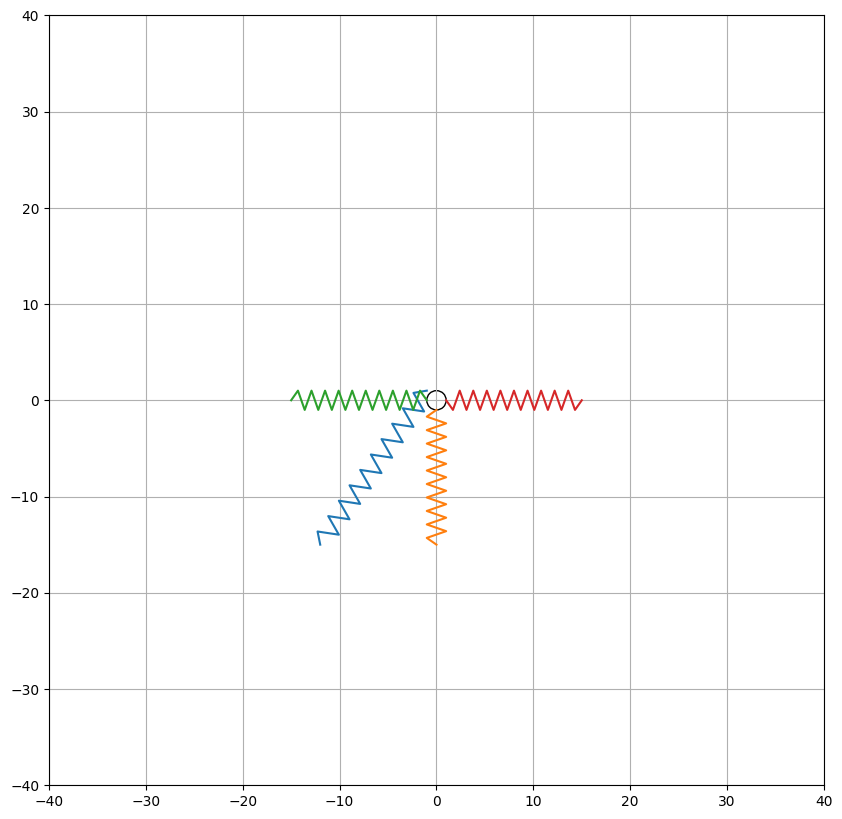

In [55]:

x_position=0
center_electron=(x_position,0)
radius_electron=1
spring_width=2
spring_edges=10
plt.figure(figsize=(10,10))
ax=plt.gca()
x,y=spring(x0=-12,x1=-1,y0=-15,y1=1,samples=spring_edges,width=spring_width)
x1,y1=spring(x0=0,x1=x_position,y0=-15,y1=-1,samples=spring_edges,width=spring_width)
x2,y2=spring(x0=-15,x1=x_position-1,y0=0,y1=0,samples=spring_edges,width=spring_width)
x3,y3=spring(x0=15,x1=x_position+1,y0=0,y1=0,samples=spring_edges,width=spring_width)
electron=Circle((center_electron),radius_electron,fill=False)
ax.add_artist(electron)
ax.plot(x,y)
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.plot(x3,y3)
ax.set_xlim(-40,40)
ax.set_ylim(-40,40)
ax.grid()